In [2]:
import pandas
import numpy as np
import glob
import os
import matplotlib.pyplot as plt 

In [ ]:
train_files = glob.glob('./../../hyperview1/train_data/train_data/train_data/*.npz')
test_files = glob.glob('./../../hyperview1/test_data/*.npz')


# sort files to ensure consistent order
train_files.sort()
test_files.sort()

In [ ]:
# # rename the files to because they are not in order tranform 1.npz to 00001.npz


# for i, f in enumerate(train_files):
#     base = os.path.basename(f)
#     base_idx = int(base.split('.')[0])
#     new_name = f"{base_idx:05d}.npz"
#     os.rename(f, os.path.join(os.path.dirname(f), new_name))

# for i, f in enumerate(test_files):
#     base = os.path.basename(f)
#     base_idx = int(base.split('.')[0])
#     new_name = f"{base_idx:05d}.npz"
#     os.rename(f, os.path.join(os.path.dirname(f), new_name))

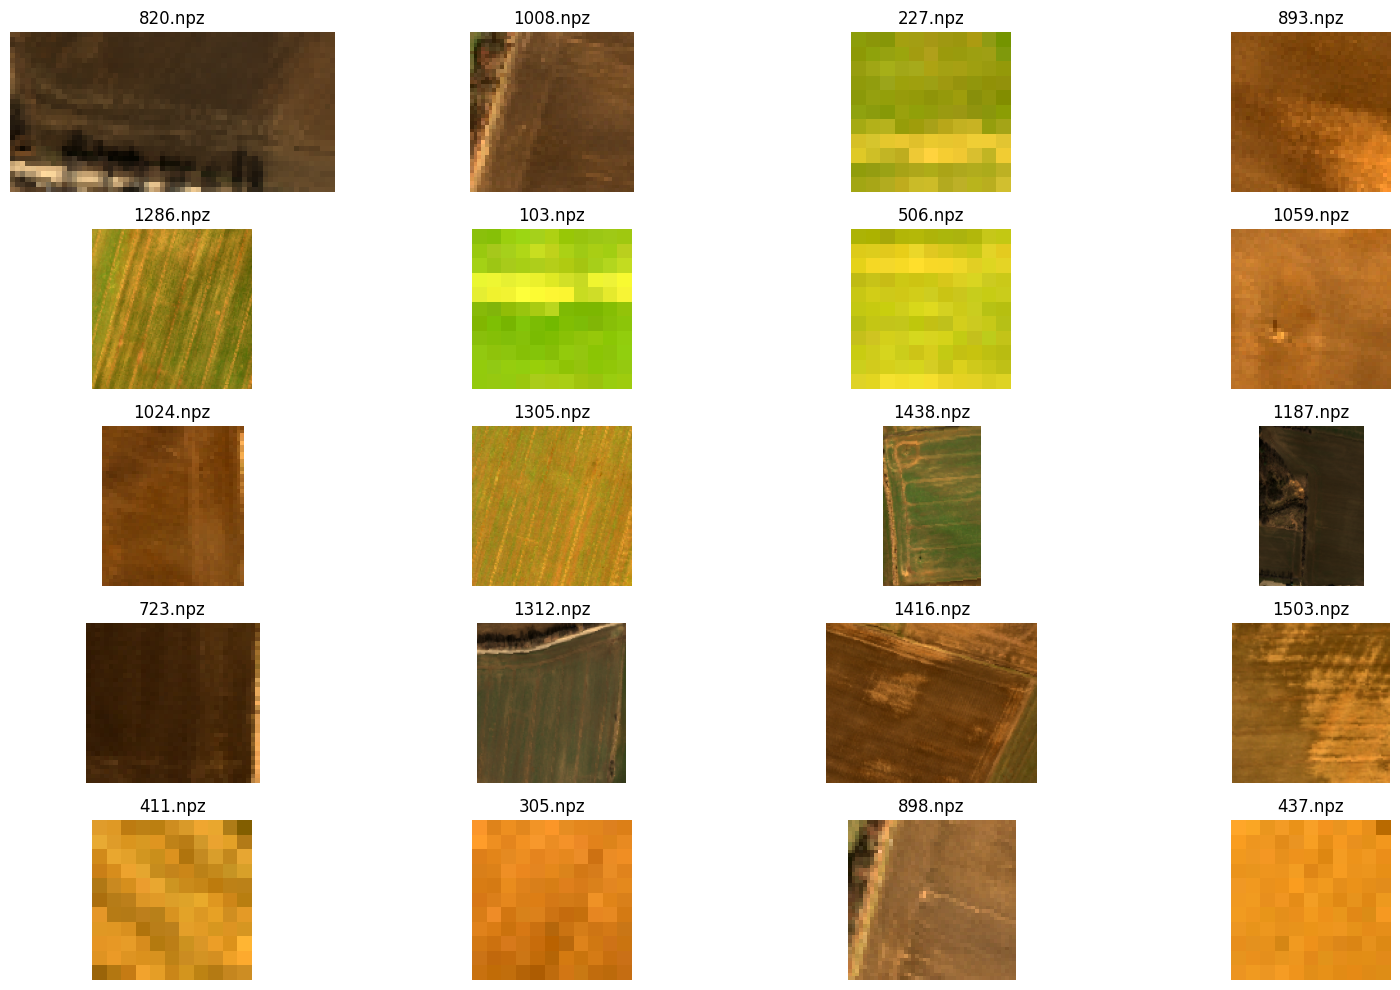

In [43]:
# Índices das bandas para RGB (Python usa índice zero)
rgb_indices = [58, 28, 2]  # R: 650.67nm, G: 554.78nm, B: 471.67nm

# Seleciona 20 arquivos aleatórios
random_files = np.random.choice(train_files, 20, replace=False)

plt.figure(figsize=(16, 10))
for i, f in enumerate(random_files):
    data = np.load(f)
    images = data['data']
    # Seleciona a primeira imagem do arquivo (ou ajuste se quiser outra)
    rgb_img = np.stack([
        images[rgb_indices[0], :, :],  # R
        images[rgb_indices[1], :, :],  # G
        images[rgb_indices[2], :, :]   # B
    ], axis=-1)
    # Normaliza para 0-1
    rgb_img = (rgb_img - rgb_img.min()) / (rgb_img.max() - rgb_img.min())
    plt.subplot(5, 4, i + 1)
    plt.imshow(rgb_img)
    plt.axis('off')
    plt.title(f.split('/')[-1])  # mostra nome do arquivo
plt.tight_layout()
plt.show()

In [118]:
np.load(train_files[674])['data'].shape  # Exemplo de carregamento de um arquivo

(150, 35, 38)

In [44]:
# quero fazer analise dos shapes 

h_train = []
w_train = []
n_pixels_train = []

for f in train_files:
    data = np.load(f)
    h_train.append(data['data'].shape[1])
    w_train.append(data['data'].shape[2])
    n_pixels_train.append(data['data'].shape[1] * data['data'].shape[2])
    

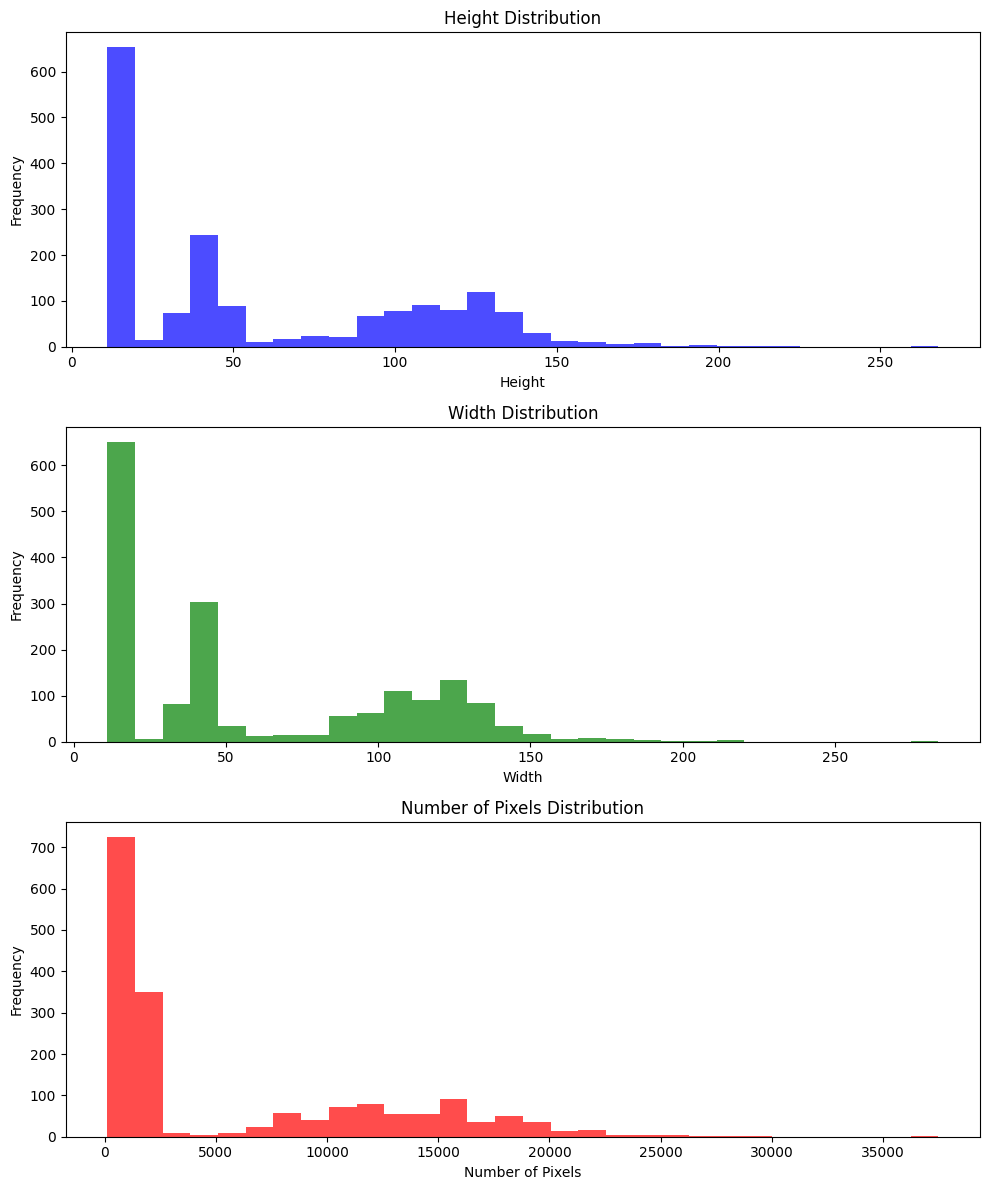

In [45]:
plt.figure(figsize=(10, 12))

plt.subplot(3, 1, 1)
plt.hist(h_train, bins=30, color='blue', alpha=0.7)
plt.title('Height Distribution')
plt.xlabel('Height')
plt.ylabel('Frequency')

plt.subplot(3, 1, 2)
plt.hist(w_train, bins=30, color='green', alpha=0.7)
plt.title('Width Distribution')
plt.xlabel('Width')
plt.ylabel('Frequency')

plt.subplot(3, 1, 3)
plt.hist(n_pixels_train, bins=30, color='red', alpha=0.7)
plt.title('Number of Pixels Distribution')
plt.xlabel('Number of Pixels')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [8]:
# quero fazer analise dos shapes 

h_test = []
w_test = []
n_pixels_test = []

for f in test_files:
    data = np.load(f)
    h_test.append(data['data'].shape[1])
    w_test.append(data['data'].shape[2])
    n_pixels_test.append(data['data'].shape[1] * data['data'].shape[2])

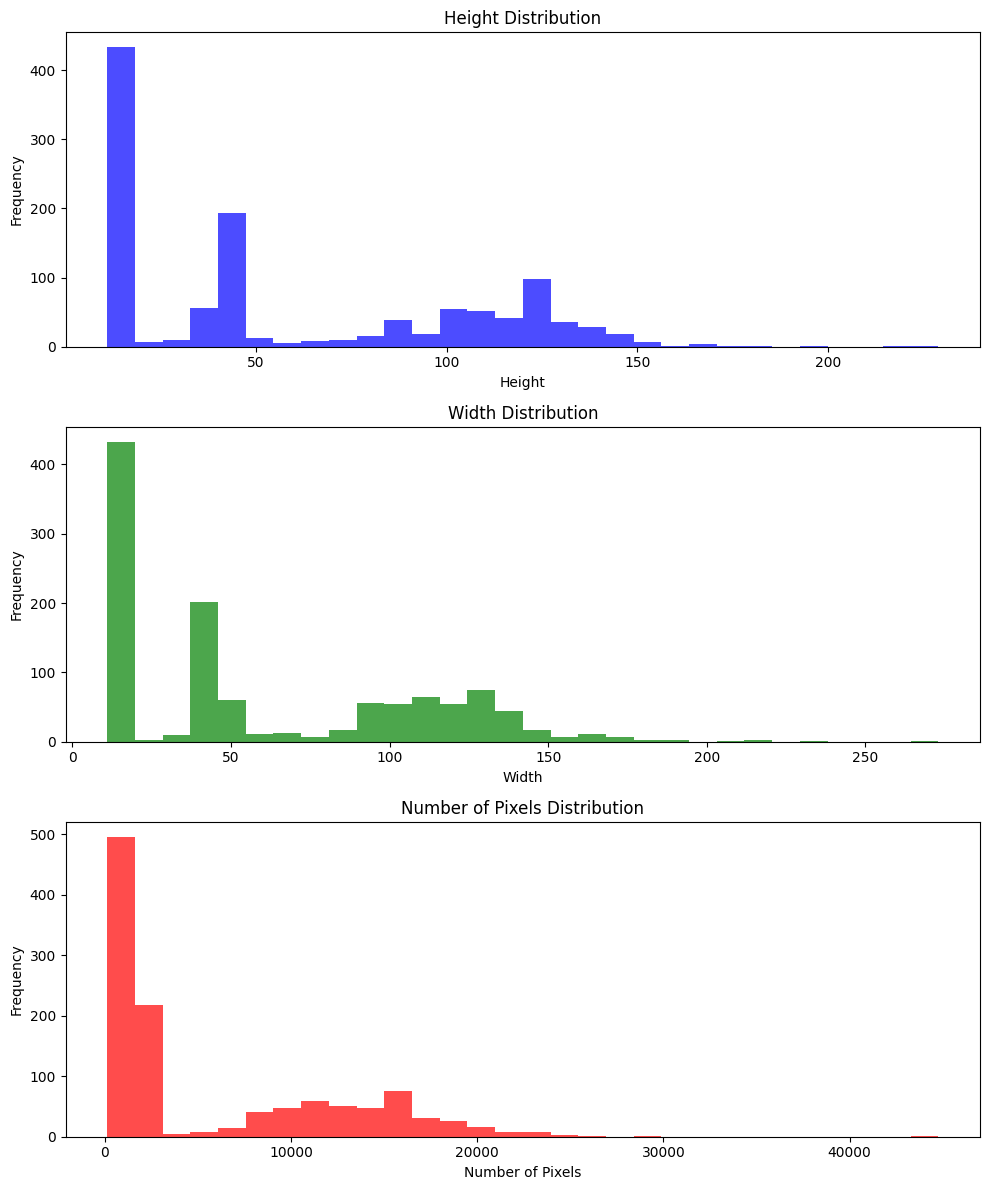

In [46]:
# plotar histogramas, subplots

plt.figure(figsize=(10, 12))

plt.subplot(3, 1, 1)
plt.hist(h_test, bins=30, color='blue', alpha=0.7)
plt.title('Height Distribution')
plt.xlabel('Height')
plt.ylabel('Frequency') 

plt.subplot(3, 1, 2)
plt.hist(w_test, bins=30, color='green', alpha=0.7)
plt.title('Width Distribution')
plt.xlabel('Width')
plt.ylabel('Frequency')

plt.subplot(3, 1, 3)
plt.hist(n_pixels_test, bins=30, color='red', alpha=0.7)
plt.title('Number of Pixels Distribution')
plt.xlabel('Number of Pixels')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:

n_bands = 150
all_means = []
all_stds = []
all_pixels = []

for f in train_files+test_files:
    data = np.load(f)['data']  # shape: (150, H, W)
    means = np.mean(data, axis=(1,2))  # média de cada banda
    stds = np.std(data, axis=(1,2))    # desvio padrão de cada banda
    pixels = data.shape[1] * data.shape[2]  # total de pixels por banda (igual para todas as bandas do arquivo)
    all_means.append(means)
    all_stds.append(stds)
    all_pixels.append(pixels)

all_means = np.array(all_means)  # shape: (n_files, 150)
all_stds = np.array(all_stds)    # shape: (n_files, 150)
all_pixels = np.array(all_pixels)  # shape: (n_files,)

# Para calcular a média ponderada de cada banda:
weighted_mean = np.average(all_means, axis=0, weights=all_pixels)
weighted_std = np.average(all_stds, axis=0, weights=all_pixels)

Média ponderada por banda: [ 337.18458099  337.33612838  333.30657651  340.54794745  349.51305187
  367.03067474  377.10514699  378.22623723  380.64402228  383.42590727
  388.48047933  396.24737826  402.25528639  418.01030687  432.71338809
  440.44458356  450.12035168  459.79681774  469.2470283   469.66163925
  477.42259877  492.42851076  514.91856207  539.95970304  554.09961778
  563.07644791  575.6659326   583.63754802  595.89837044  604.77682191
  616.79852527  625.9691232   632.86248302  636.48963737  637.07296514
  638.47802103  645.90954978  651.07865077  659.47691534  668.78980852
  678.46744261  683.88823846  688.3423753   691.33115143  698.18880944
  705.43379031  709.2123492   708.93807367  712.15203114  716.13118124
  722.20202939  726.458854    728.81989903  728.86640003  733.40120274
  738.77651391  744.76530961  759.52290536  766.65981395  763.8754465
  756.65547342  747.24499253  741.51401845  739.6625159   744.19173565
  738.13359328  734.89687669  739.57251225  750.380

In [88]:
normalized_train = []
normalized_test = []

for f in train_files:
    data = np.load(f)['data']  # shape: (150, H, W)
    norm_data = (data - weighted_mean[:, None, None]) / weighted_std[:, None, None]
    normalized_train.append(norm_data)

for f in test_files:
    data = np.load(f)['data']  # shape: (150, H, W)
    norm_data = (data - weighted_mean[:, None, None]) / weighted_std[:, None, None]
    normalized_test.append(norm_data)

In [93]:
# tranformar train e test em um flatten, calcular o percentil 1 e 99 e fazer clip

flat_train = np.concatenate([img.reshape(n_bands, -1) for img in normalized_train], axis=1)  # shape: (150, total_pixels)
flat_test = np.concatenate([img.reshape(n_bands, -1) for img in normalized_test], axis=1)    # shape: (150, total_pixels)
p1 = np.percentile(flat_train, 1, axis=1)  # shape: (150,)
p99 = np.percentile(flat_train, 99, axis=1)  # shape: (150,)
normalized_train = [(np.clip(img, p1[:, None, None], p99[:, None, None])) for img in normalized_train]
normalized_test = [(np.clip(img, p1[:, None, None], p99[:, None, None])) for img in normalized_test]


# del  flat_train, flat_test  # liberar memória

del flat_train, flat_test  # liberar memória

In [94]:
#printar o max e o min e o index da imagem
for i in range(len(normalized_train)):
    print(np.min(normalized_train[i]), np.max(normalized_train[i]), i)

-1.9552497904324655 4.4502560411903636 0
-1.213514507411603 2.9007016980976044 1
-3.3974649570387006 3.0057474322018494 2
-3.402732831188058 7.190695951352602 3
-3.0292738073837207 1.0638907152570891 4
-2.353519389055343 7.463387378752428 5
-2.2211381121124103 2.620530948335681 6
-2.489992321896646 1.5325355852713671 7
-3.135711855487369 4.307803864678117 8
-3.402732831188058 4.767153721696003 9
-3.402732831188058 7.441220316810414 10
-1.9519638666272792 2.137054376987315 11
-2.5988199642518897 1.9375143509459816 12
-3.402732831188058 5.049397493405428 13
-0.7854551260073055 4.353253822545996 14
-1.659759443067105 4.17322894283795 15
-1.4734720501628558 7.463387378752428 16
-1.1675939945865672 4.353253822545996 17
-2.123918054550537 3.595390400392737 18
-2.38236109969608 2.6921791995008926 19
-3.402732831188058 4.833911870373103 20
-1.0108340881331226 4.353253822545996 21
-3.402732831188058 5.336200796801926 22
-2.4488887348133104 -0.37501880234814544 23
-2.347095685851748 7.4633873787

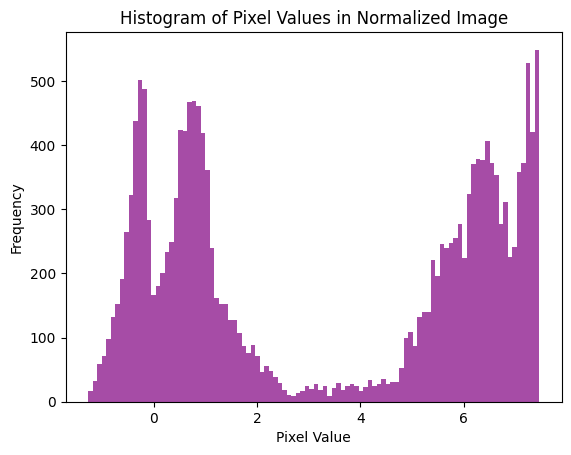

In [95]:
# pegar uma imagem e plotar o histograma  dos valores dos pixes


img = normalized_train[1447].flatten()

plt.hist(img, bins=100, color='purple', alpha=0.7)
plt.title('Histogram of Pixel Values in Normalized Image')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()


In [127]:
normalized_npy = './../../hyperview1/normalized_npy/'

normalized_files = glob.glob(normalized_npy + '**/*.npy')

In [132]:
np.load(normalized_files[140000]).shape

(150, 10, 10)